<a href="https://www.kaggle.com/code/piotrpowroznik/geothermal-model?scriptVersionId=266445399" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Geothermal Model

Geothermal model simulation of heat distribution in grid 200x200 with nodes spaced 5 meters apart. Model consists of:
* Background with a thermal diffusivity equal to 0.001 and 3 randomly located ore bodies with a diameter of 100 meters and thermal diffusivity 0.01
* The temperature at the depth of 1000 meters is constant and equal to 50 Celsius degrees.
* The temperature on the surface is constant and equal to 0 Celsius degrees
* For boundary conditions zero-gradient boundary condition was applied
* Stability condition is determined by following inequality:
  $$
    |1-\frac{L_{new}}{L_{old}}| < 0.0001
  $$

Variant of the thermal conductivity equation for use in the task:
$$
T_{i,j}^{k+1} = (1-\frac{4\Delta t \alpha}{h^2})T_{i,j}^k + \Delta t \alpha(\frac{T_{i,j-1}^k + T_{i-1,j}^k + T_{i+1,j}^k+ T_{i,j+1}^k}{h^2})
$$
$$
\Delta t \leqslant \frac{h^2}{4\alpha}
$$


In [1]:
library(animation)
library(plotrix)
library(IRdisplay)

## Initial Conditions

In [2]:
# Start measuring execution time
start <- Sys.time()

# Grid size
N <- 200

# Spatial step size
h <- 5

# Radius of circular objects
r <- 20

# Number of circles
circles <- 3

# Stability check flag
stable_flag <- 0

# Initialize matrices for new and previous time steps
Lnew <- matrix(nrow = N, ncol = N, 0)
L <- matrix(nrow = N, ncol = N, 0)

In [3]:
# Function to draw circles in the grid
draw_Circle <- function(a, x_center, y_center, r) {
  for (x in (x_center - r):(x_center + r)) {
    for (y in (y_center - r):(y_center + r)) {
      if (x >= 0 && x <= N && y >= 0 && y <= N) {
        if (((x - x_center)^2 + (y - y_center)^2) <= r^2) {
          a[x, y] <- 0.01
        }
      }
    }
  }
  return(a)
}

In [4]:
# Generate a 3-body model
a <- matrix(nrow = N, ncol = N, 0.002)
Center_positions <- c()

for (i in 1:circles) {
  pos <- round(runif(2) * (N - 2 * r) + r)
  Center_positions <- c(Center_positions, pos[1], pos[2])
  a <- draw_Circle(a, pos[1], pos[2], r)
}


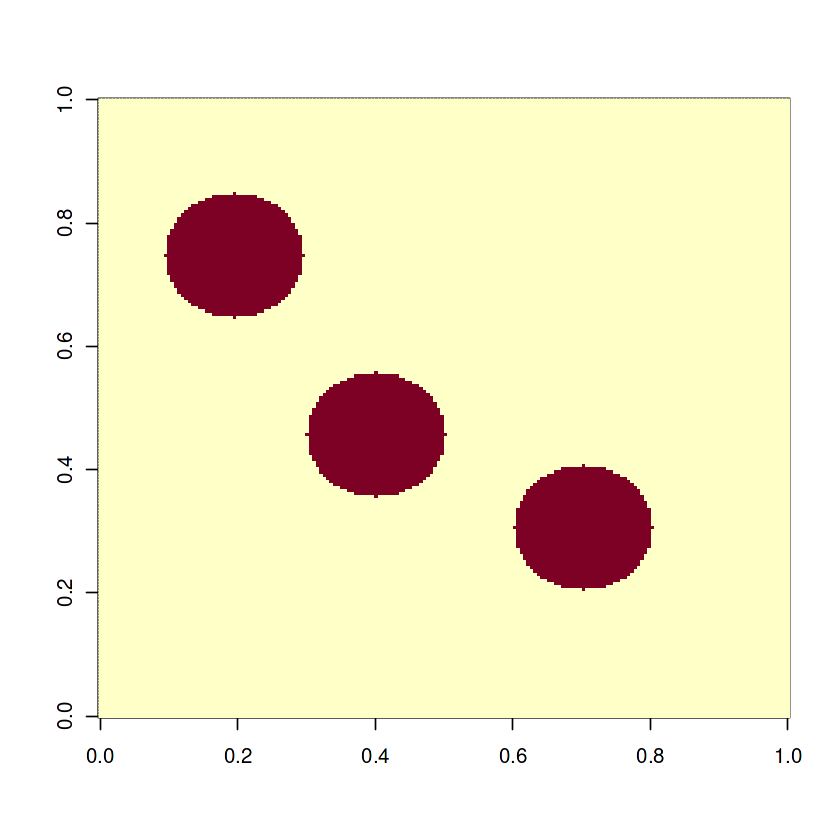

In [5]:
image(t(apply(a, 2, rev)))

In [6]:
# Maximum diffusion coefficient for stability
a_max <- max(a)

# Time step for simulation
dt <- h^2 / (4 * a_max)

# Total simulation time
t <- 0

# Boundary conditions
L[, 1] <- rep(0, N)
L[, N] <- rep(0, N)
L[1, ] <- rep(0, N)
L[N, ] <- rep(50, N)

In [7]:
# Copy boundary conditions to the next time step
Lnew <- L

# Number of iterations
niter <- 20000

# Initialize progress bar
prog_bar <- txtProgressBar(min = 0, max = niter, style = 3)


  |                                                                      |   0%

## Heat Simulation 

In [8]:
# Save animation as GIF with default settings
saveGIF({
  iteration_count <- -1
  
  # Time iteration loop
  for (k in 1:niter) {
    t <- t + dt
    
    # Update progress bar
    iteration_count <- iteration_count + 1
    setTxtProgressBar(prog_bar, iteration_count)
    
    # Update grid values
    for (i in 2:(N - 1)) {
      for (j in 2:(N - 1)) {
        Lnew[i, j] <- (1 - (4 * dt * a[i, j]) / (h^2)) * L[i, j] +
          dt * a[i, j] * ((L[i - 1, j] + L[i + 1, j] + L[i, j - 1] + L[i, j + 1]) / (h^2))
      }
    }
    
    # Simple zero-gradient boundary condition
    Lnew[, 1] <- L[, 2]
    Lnew[, N] <- L[, N - 1]
    
    # Move to the next iteration
    auxL <- L
    L <- Lnew
    
    # Check for stability
    if (stable_flag != 1) {
      if (abs(1 - (mean(Lnew) / mean(auxL))) < 0.0001) {
        print(paste0("Stability achieved at iteration: ", k))
        print(paste0("Corresponds to day: ", round((t / (3600 * 24)), 0)))
        stable_flag <- 1
      }
    }
    
    # Visualize every 100 iterations
    if (k %% 100 == 0) {
      Limg <- apply(L, 2, rev)
      image(t(Limg))
      
      # Display simulation time in days
      text(0.2, 0.9, round(t / (3600 * 24)))
      
      # Draw circles
      for (i in seq(1, 7, 2)) {
        draw.ellipse(1 - Center_positions[i] / 200, (Center_positions[i + 1] / 200), 
                     a = 1 / (N / r), b = 1 / (N / r), nv = 100, lwd = 1, border = "black")
      }
      box()
    }
  }
}, interval = 0.1)

# Stop measuring execution time
stop <- Sys.time()

# Print execution time
stop - start


  |                                                                      |   1%

  |=                                                                     |   1%

  |=                                                                     |   2%

  |==                                                                    |   2%

  |==                                                                    |   3%

  |==                                                                    |   4%

  |===                                                                   |   4%

  |===                                                                   |   5%

  |====                                                                  |   5%

  |====                                                                  |   6%

  |=====                                                                 |   6%

  |=====                                                                 |   7%

  |=====                                                                 |   8%

  |======                                                                |   8%

  |======                                                                |   9%

  |=======                                                               |   9%

  |=======                                                               |  10%

  |=======                                                               |  11%

  |========                                                              |  11%

  |========                                                              |  12%

  |=========                                                             |  12%

  |=========                                                             |  13%

  |=========                                                             |  14%

  |==========                                                            |  14%

  |==========                                                            |  15%

  |===========                                                           |  15%

  |===========                                                           |  16%

  |============                                                          |  16%

  |============                                                          |  17%

  |============                                                          |  18%

  |=============                                                         |  18%

  |=============                                                         |  19%

  |==============                                                        |  19%

  |==============                                                        |  20%

  |==============                                                        |  21%

  |===============                                                       |  21%

  |===============                                                       |  22%

  |================                                                      |  22%

  |================                                                      |  23%

  |================                                                      |  24%

  |=================                                                     |  24%

  |=================                                                     |  25%

  |==================                                                    |  25%

[1] "Stability achieved at iteration: 5012"
[1] "Corresponds to day: 36"


  |==================                                                    |  26%

  |===================                                                   |  26%

  |===================                                                   |  27%

  |===================                                                   |  28%

  |====================                                                  |  28%

  |====================                                                  |  29%

  |=====================                                                 |  29%

  |=====================                                                 |  30%

  |=====================                                                 |  31%

  |======================                                                |  31%

  |======================                                                |  32%

  |=======================                                               |  32%

  |=======================                                               |  33%

  |=======================                                               |  34%

  |========================                                              |  34%

  |========================                                              |  35%

  |=========================                                             |  35%

  |=========================                                             |  36%

  |==========================                                            |  36%

  |==========================                                            |  37%

  |==========================                                            |  38%

  |===========================                                           |  38%

  |===========================                                           |  39%

  |============================                                          |  39%

  |============================                                          |  40%

  |============================                                          |  41%

  |=============================                                         |  41%

  |=============================                                         |  42%

  |==============================                                        |  42%

  |==============================                                        |  43%

  |==============================                                        |  44%

  |===============================                                       |  44%

  |===============================                                       |  45%

  |================================                                      |  45%

  |================================                                      |  46%

  |=================================                                     |  46%

  |=================================                                     |  47%

  |=================================                                     |  48%

  |==================================                                    |  48%

  |==================================                                    |  49%

  |===================================                                   |  49%

  |===================================                                   |  50%

  |===================================                                   |  51%

  |====================================                                  |  51%

  |====================================                                  |  52%

  |=====================================                                 |  52%

  |=====================================                                 |  53%

  |=====================================                                 |  54%

  |======================================                                |  54%

  |======================================                                |  55%

  |=======================================                               |  55%

  |=======================================                               |  56%

  |========================================                              |  56%

  |========================================                              |  57%

  |========================================                              |  58%

  |=========================================                             |  58%

  |=========================================                             |  59%

  |==========================================                            |  59%

  |==========================================                            |  60%

  |==========================================                            |  61%

  |===========================================                           |  61%

  |===========================================                           |  62%

  |============================================                          |  62%

  |============================================                          |  63%

  |============================================                          |  64%

  |=============================================                         |  64%

  |=============================================                         |  65%

  |==============================================                        |  65%

  |==============================================                        |  66%

  |===============================================                       |  66%

  |===============================================                       |  67%

  |===============================================                       |  68%

  |================================================                      |  68%

  |================================================                      |  69%

  |=================================================                     |  69%

  |=================================================                     |  70%

  |=================================================                     |  71%

  |==================================================                    |  71%

  |==================================================                    |  72%

  |===================================================                   |  72%

  |===================================================                   |  73%

  |===================================================                   |  74%

  |====================================================                  |  74%

  |====================================================                  |  75%

  |=====================================================                 |  75%

  |=====================================================                 |  76%

  |======================================================                |  76%

  |======================================================                |  77%

  |======================================================                |  78%

  |=======================================================               |  78%

  |=======================================================               |  79%

  |========================================================              |  79%

  |========================================================              |  80%

  |========================================================              |  81%

  |=========================================================             |  81%

  |=========================================================             |  82%

  |==========================================================            |  82%

  |==========================================================            |  83%

  |==========================================================            |  84%

  |===========================================================           |  84%

  |===========================================================           |  85%

  |============================================================          |  85%

  |============================================================          |  86%

  |=============================================================         |  86%

  |=============================================================         |  87%

  |=============================================================         |  88%

  |==============================================================        |  88%

  |==============================================================        |  89%

  |===============================================================       |  89%

  |===============================================================       |  90%

  |===============================================================       |  91%

  |================================================================      |  91%

  |================================================================      |  92%

  |=================================================================     |  92%

  |=================================================================     |  93%

  |=================================================================     |  94%

  |==================================================================    |  94%

  |==================================================================    |  95%

  |===================================================================   |  95%

  |===================================================================   |  96%

  |====================================================================  |  96%

  |====================================================================  |  97%

  |====================================================================  |  98%

  |===================================================================== |  98%

  |===================================================================== |  99%

  |======================================================================|  99%

  |======================================================================| 100%

Output at: animation.gif



[1] TRUE

Time difference of 11.47463 mins

## Results

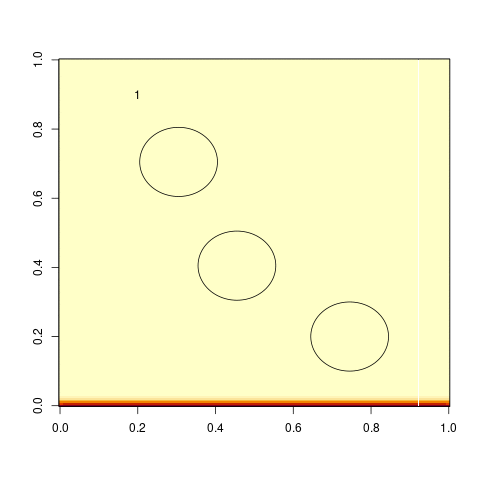

In [9]:
display_png(file = "animation.gif")

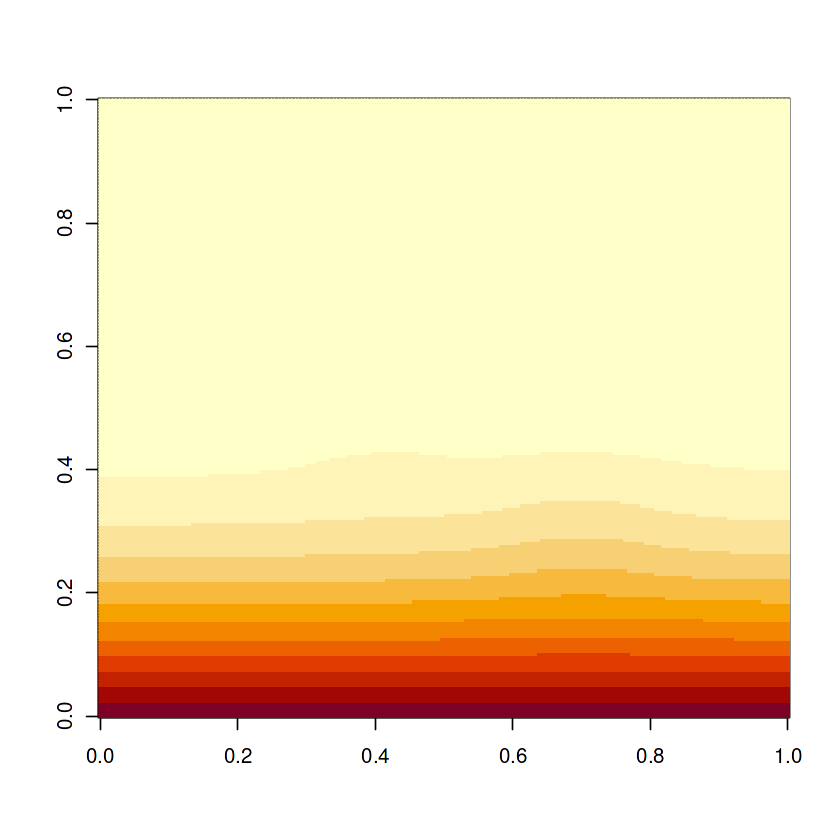

In [10]:
# Display final image
image(t(L)[, ncol(L):1])